In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_excel('False_Alarm_Cases.xlsx')

In [16]:
df.head()

,Case No.,Ambient Temperature( deg C),Calibration(days),Unwanted substance deposition(0/1),Humidity(%),H2S Content(ppm),detected by(% of sensors),Spuriosity Index(0/1),Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Case # 1,-2,226,1,96,9,21,1,NaN,NaN,NaN
1,Case # 2,4,134,1,83,4,77,0,NaN,NaN,NaN
2,Case # 3,7,163,0,69,2,81,0,NaN,NaN,NaN
3,Case # 4,5,162,0,80,6,69,0,NaN,NaN,NaN
4,Case # 5,2,192,1,87,3,67,0,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Case No.                            1892 non-null   object 
 1   Ambient Temperature( deg C)         1892 non-null   int64  
 2   Calibration(days)                   1892 non-null   int64  
 3   Unwanted substance deposition(0/1)  1892 non-null   int64  
 4   Humidity(%)                         1892 non-null   int64  
 5   H2S Content(ppm)                    1892 non-null   int64  
 6   detected by(% of sensors)           1892 non-null   int64  
 7   Spuriosity Index(0/1)               1892 non-null   int64  
 8   Unnamed: 8                          0 non-null      float64
 9   Unnamed: 9                          0 non-null      float64
 10  Unnamed: 10                         1 non-null      float64
dtypes: float64(3), int64(7), object(1)
memory u

In [18]:
df.drop(['Case No.','Unnamed: 8','Unnamed: 9','Unnamed: 10'],axis=1,inplace=True)

In [19]:
df.head()

,Ambient Temperature( deg C),Calibration(days),Unwanted substance deposition(0/1),Humidity(%),H2S Content(ppm),detected by(% of sensors),Spuriosity Index(0/1)
0,-2,226,1,96,9,21,1
1,4,134,1,83,4,77,0
2,7,163,0,69,2,81,0
3,5,162,0,80,6,69,0
4,2,192,1,87,3,67,0


In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(df)
scaled_data=ss.transform(df)

In [21]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [22]:
x_pca=pca.transform(scaled_data)

In [23]:
scaled_data.shape

(1892, 7)

In [24]:
x_pca.shape

(1892, 2)

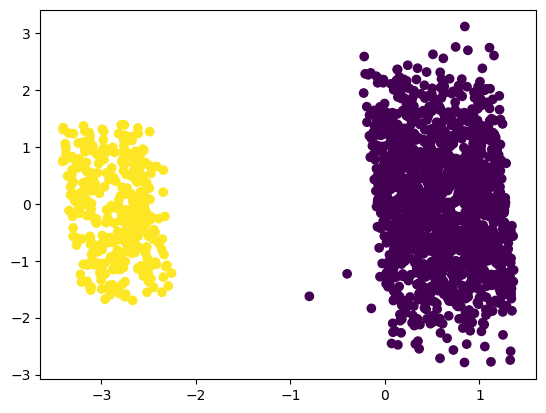

In [25]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Spuriosity Index(0/1)'])

In [26]:
#Hence apply Navis Bais